# Assignment 3 - Supervised Learning

## Vignesh Kumaresan
Netid:  vk77

## 1
### [40 points] From theory to practice: classification through logistic regression

#### Introduction
For this problem you will derive, implement through gradient descent, and test the performance of a logistic regression classifier for a binary classification problem.

In this case, we'll assume our logistic regression problem will be applied to a two dimensional feature space. Our logistic regression model is:

$$f(\mathbf{x}_i,\mathbf{w})=\sigma(\mathbf{w}^T \mathbf{x}_i)$$

where the sigmoid function is defined as $\sigma(x) = \frac{e^x}{1+e^{x}}= \frac{1}{1+e^{-x}}$. Also, since this is a two-dimensional problem, we define $\mathbf{w}^T \mathbf{x}_i = w_0 x_{i,0} + w_1 x_{i,1} + w_2 x_{i,2}$ and here, $x_{i,0} \triangleq 1$

As in class, we will interpret the response of the logistic regression classifier to be the likelihood of the data given the model. For one sample, $(y_i, \mathbf{x_i})$, this is given as:

$$P(Y=y_i|X=x_i) = f(\mathbf{x}_i,\mathbf{w})=\sigma(\mathbf{w}^T \mathbf{x}_i)$$

#### Find the cost function that we can use to choose the model parameters, $\mathbf{w}$, that best fit the training data.

**(a)** What is the likelihood function of the data that we will wish to maximize?

**(b)** Since a logarithm is a monotonic function, maximizing the $f(x)$ is equivalent to maximizing $\ln [f(x)]$. Express part (a) as a cost function of the model parameters, $C(\mathbf{w})$, that is the negative of the logarithm of (a).

**(c)** Calculate the gradient of the cost function with respect to the model parameters $\nabla_{\mathbf{w}}C(\mathbf{w})$. Express this in terms of the partial derivatives of the cost function with respect to each of the parameters, e.g. $\nabla_{\mathbf{w}}C(\mathbf{w}) = \left[\frac{\partial C}{\partial w_0}, \frac{\partial C}{\partial w_1}, \frac{\partial C}{\partial w_2}\right]$.

**(d)** Write out the gradient descent update equation, assuming $\eta$ represents the learning rate.

#### Prepare and plot your data

**(e)** Load the data and scatter plot the data by class. In the data folder in the same directory of this notebook, you'll find the data in `A3_Q1_data.csv`. This file contains the binary class labels, $y$, and the features $x_1$ and $x_2$.  Comment on the data: do the data appear separable? Why might logistic regression be a good choice for these data or not?

**(f)** Do the data require any preprocessing due to missing values, scale differences, etc? If so, how did you remediate this?

#### Implement gradient descent and your logistic regression algorithm

**(g)** Create a function or class to implement your logistic regression. It should take as inputs the model parameters, $\mathbf{w}=\left[w_0,w_1,w_2\right]$, and output the class confidence probabilities, $P(Y=y_i|X=x_i)$.

**(h)** Create a function that computes the cost function $C(\mathbf{w})$ for a given dataset and corresponding class labels.

**(i)** Create a function or class to run gradient descent on your training data. We'll refer to this as "batch" gradient descent since it takes into account the gradient based on all our data at each iteration (or "epoch") of the algorithm. Divide your data into a training and testing set where the test set accounts for 30 percent of the data and the training set the remaining 70 percent. In doing this we'll need to make some assumptions / experiment with the following:
1. The initialization of the algorithm - what should you initialize the model parameters to? For this, randomly initialize the weights to a different values between 0 and 1.
2. The learning rate - how slow/fast should the algorithm proceed in the direction opposite the gradient? This you will experiment with.
3. Stopping criteria - when should the algorithm be finished searching for the optimum? Set this to be when the cost function changes by no more than $10^{-6}$ between iterations. Since we have a weight vector, you can compute this by seeing if the L2 norm of the weight vector changes by no more than $10^{-6}$ between iterations.

**(j)** At each step in the gradient descent algorithm it will produce updated parameter estimates. For each set of estimates, calculate the cost function for both the training and the test data. 

**(k)** Show this process for different learning rates by plotting the resulting cost as a function of iteration (or "epoch"). What is the impact that each parameter has on the process and the results? What choices did you make in your chosen approach and why? Use the parameter you choose here for the learning rate for the remainder of this question.

#### Test your model performance through cross validation

**(l)** Test the performance of your trained classifier using K-folds cross validation (while this can be done manually, the scikit-learn package [StratifiedKFolds](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold) may be helpful). Produce Receiver Operating Characteristic Curves (ROC curves) of your cross validated performance. 

**(m)** Why do we use cross validation?

**(n)** Make two plots - one of your training data, and one for your test data - with the data scatterplotted and the decision boundary for your classifier. Comment on your decision boundary. Could it be improved?

**(o)** Compare your trained model to random guessing. Show the ROC curve for your model and plot the chance diagonal. What area under the curve (AUC) does your model achieve? How does your model compare in terms of performance?

**ANSWER**

### a
For each label, we are trying to maximize the likelihood function: 

$$ L(θ)=\prod\limits_{i=1}^n= P(Y=y_{(i)}|X=x_{(i)}) $$

We know that Y is a Bernoulli event with p = $$ \sigma(\mathbf{w}^T \mathbf{x}_i) $$ 

Thus, we can change our function to be:

$$ \prod\limits_{i=1}^n  \sigma(\mathbf{w}^T \mathbf{x}_i)^{y_i} * [1 - \sigma(\mathbf{w}^T \mathbf{x}_i)]^{1-{y_i}} $$




### b
$$ C(w) = -log(\prod\limits_{i=1}^n  \sigma(\mathbf{w}^T \mathbf{x}_i)^{y_i} * [1 - \sigma(\mathbf{w}^T \mathbf{x}_i)]^{1-{y_i}})  $$

$$ = - \sum\limits_{i=1}^n  {y_i}log(\sigma(\mathbf{w}^T \mathbf{x}_i)) + (1-{y_i})log([1 - \sigma(\mathbf{w}^T \mathbf{x}_i))] $$

### c

If we set:

$$ p = \sigma(\mathbf{w}^T \mathbf{x}_i) $$

then we get: 

$$ \nabla_{\mathbf{w}}C(\mathbf{w}) = \frac{\partial C}{\partial w_j} $$

$$ = \frac{\partial C}{\partial p} * \frac{\partial p}{\partial w_j} $$

If we set:

$$ z = (\mathbf{w}^T \mathbf{x}_i) $$

then we get: 

$$ = \frac{\partial C}{\partial p} * \frac{\partial p}{\partial z} * \frac{\partial z}{\partial w} $$

If we solve each partial derivative, then we get:

$$ C(x) = - \sum\limits_{i=1}^n  {y_i}log(p) + (1-{y_i})log([1 - p] $$

$$ \frac{\partial C}{\partial p} = \frac{y}{p} - \frac{1-y}{1-p} $$


$$ p = \sigma(z) $$

$$ \frac{\partial p}{\partial z} = \sigma(z)*\left[1-\sigma(z)\right] $$


$$ z = (\mathbf{w}^T \mathbf{x}_i) $$

$$ \frac{\partial z}{\partial w_j} = x_j $$

We can then multiply these partial derivatives together:

$$ \frac{\partial C}{\partial w} = \left[\frac{y}{p} - \frac{1-y}{1-p}\right] * p\left[1-p\right] * x_j $$

$$ = \left[y -  p\right]*x_j $$

$$ = \left[y - \sigma(\mathbf{w}^T \mathbf{x}_i)\right] * x_j $$


### d
Gradient descent update equation:

$$ w_j^{new} = w_j^{old} - \eta * \sum\limits_{i=1}^n \left[y - \sigma(\mathbf{w}^T \mathbf{x}_i)\right] * x_j $$

### e

In [314]:
# e 
# Load data 
import pandas as pd

data = pd.read_csv('/Users/vigneshkumaresan/Desktop/MIDS/Machine Learning/ids705/assignments/data/A3_Q1_data.csv')
data.shape

(100000, 3)

In [315]:
data.head()

,x1,x2,y
0,2.553124,0.337757,0.0
1,-0.877757,0.045790,1.0
2,-0.903528,0.368076,1.0
3,-1.532152,-0.863737,1.0
4,-0.046954,-0.388761,1.0


In [316]:
# Check classes
data['y'].value_counts()

1.0    50000
0.0    50000
Name: y, dtype: int64

In [317]:
# Examine first 10 observations labeled 1
data[data['y'] == 1].head(10)

,x1,x2,y
1,-0.877757,0.045790,1.0
2,-0.903528,0.368076,1.0
3,-1.532152,-0.863737,1.0
4,-0.046954,-0.388761,1.0
6,-0.502558,-1.643805,1.0
8,-0.469223,-1.574729,1.0
10,-1.458155,-1.638014,1.0
12,0.172939,-0.116064,1.0
14,-0.109783,-2.369723,1.0
18,-0.366628,-0.534452,1.0


In [318]:
# Examine first 10 observations labeled 0
data[data['y'] == 0].head(10)

,x1,x2,y
0,2.553124,0.337757,0.0
5,-0.021464,-1.555591,0.0
7,2.026366,1.134847,0.0
9,0.914134,-0.949709,0.0
11,1.054661,0.454724,0.0
13,0.774929,-0.685646,0.0
15,0.241180,-0.597400,0.0
16,1.442774,1.116971,0.0
17,0.640038,1.500602,0.0
19,2.337331,0.617793,0.0


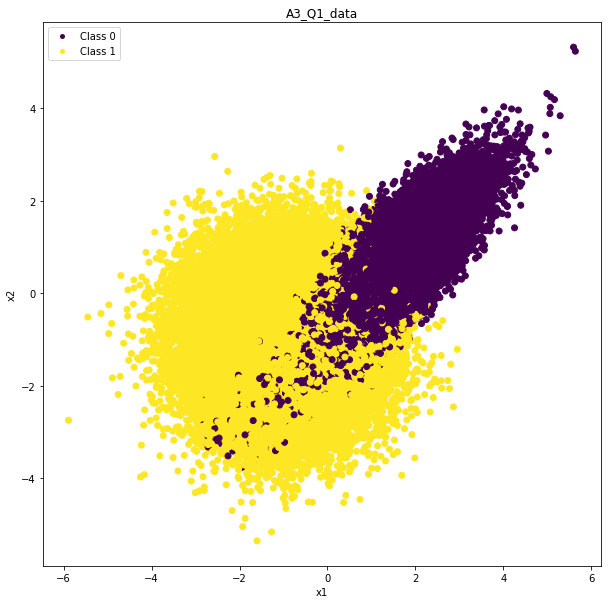

In [319]:
# Scatterplot data by class
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

fig = plt.figure(figsize=(10, 10))
sc = plt.scatter(data['x1'], data['x2'], c=data['y'])
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('A3_Q1_data')
lp = lambda i: plt.plot([],color=sc.cmap(sc.norm(i)), ms=np.sqrt(25), mec="none",
                        label="Class {:g}".format(i), ls="", marker="o")[0]
handles = [lp(i) for i in np.unique(data['y'])]
plt.legend(handles=handles)
plt.show()

#### Comments on dataset
Looking at the data, we can see that we have a 50-50 class balance, so we don't have to worry about any class imbalance issues. From the plot, we can see that the classes aren't completely separated, but there is enough seperation there for logistic regression to provide us with a reasonable decision boundary. 


### f

In [320]:
# Check for any missing values
data.isnull().sum()

x1    0
x2    0
y     0
dtype: int64

No missing values in our dataset, and no need to scale or normalize our features because x1 and x2 seem to be on a comparable scale.

### g

In [321]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def predict_probs(X, theta):
    return sigmoid(np.dot(X, theta))

def predict(X, theta, threshold=0.5):
    return predict_probs(X, theta) >= threshold

### h

In [322]:
def costFunction(theta, X, y):
    m=len(y)
    
    predictions = sigmoid(np.dot(X,theta))
    error = (-y * np.log(predictions)) - ((1-y)*np.log(1-predictions))

    cost = 1/m * sum(error)
    
    grad = 1/m * np.dot(X.transpose(),(predictions - y))
    
    return cost[0] , grad

## i

In [323]:
def gradient(theta, X, y):
    return ((1/m) * X.T @ (sigmoid(X @ theta) - y))

In [341]:
import random

X = data.iloc[:,:-1]
y = data.iloc[:,2]

(m, n) = X.shape
X = np.hstack((np.ones((m,1)), X))
y = y[:, np.newaxis]
theta = np.random.random_sample((n+1,1)) # intializing theta to random values between 0 and 1

J = costFunction(theta, X, y)
print(J)

(1.1826851071953686, array([[-0.05460106],
       [ 0.76542123],
       [ 0.58679731]]))


In [342]:
# Split data into train and test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

## j

In [343]:
def gradientDescent(X_train,y_train,X_test,y_test,theta,alpha,num_iters):
    m=len(y)
    cost_history_train = []
    cost_history_test = []
    
    for i in range(num_iters):
        cost_train, grad_train = costFunction(theta,X_train,y_train)
        cost_test, grad_test = costFunction(theta,X_test,y_test)
        theta = theta - (alpha * grad_train)
        cost_history_train.append(cost_train)
        cost_history_test.append(cost_test)
    
    return theta , cost_history_train, cost_history_test

## k

Text(0.5,1,'Gradient Descent: alpha = 0.01, Validation Set')

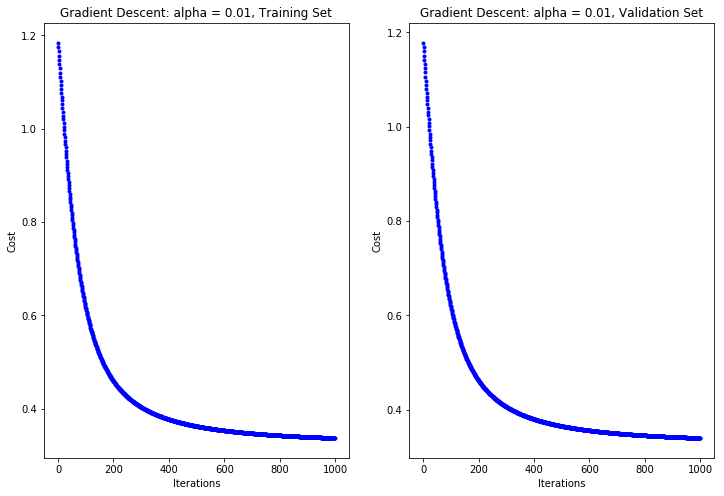

In [344]:
# Alpha = 0.01
alpha = 0.01
num_iters = 1000

theta_1, cost_1_train, cost_1_test = gradientDescent(X_train,y_train,X_test,y_test,theta,alpha,num_iters)

fig = plt.subplots(figsize=(12,8))

plt.subplot(1,2,1) 
plt.ylabel('Cost')
plt.xlabel('Iterations')
plt.plot(range(num_iters), cost_1_train,'b.')
plt.title('Gradient Descent: alpha = 0.01, Training Set')

plt.subplot(1,2,2) 
plt.ylabel('Cost')
plt.xlabel('Iterations')
plt.plot(range(num_iters), cost_1_test,'b.')
plt.title('Gradient Descent: alpha = 0.01, Validation Set')

Text(0.5,1,'Gradient Descent: alpha = 0.1, Validation Set')

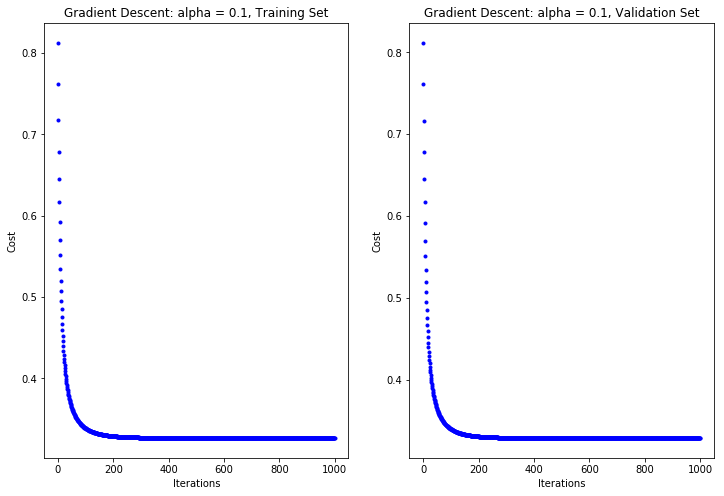

In [172]:
# Alpha = 0.1
alpha = 0.1
num_iters = 1000

theta_2, cost_2_train, cost_2_test = gradientDescent(X_train,y_train,X_test,y_test,theta,alpha,num_iters)

fig = plt.subplots(figsize=(12,8))

plt.subplot(1,2,1) 
plt.ylabel('Cost')
plt.xlabel('Iterations')
plt.plot(range(num_iters), cost_2_train,'b.')
plt.title('Gradient Descent: alpha = 0.1, Training Set')

plt.subplot(1,2,2) 
plt.ylabel('Cost')
plt.xlabel('Iterations')
plt.plot(range(num_iters), cost_2_test,'b.')
plt.title('Gradient Descent: alpha = 0.1, Validation Set')

Text(0.5,1,'Gradient Descent: alpha = 0.5, Validation Set')

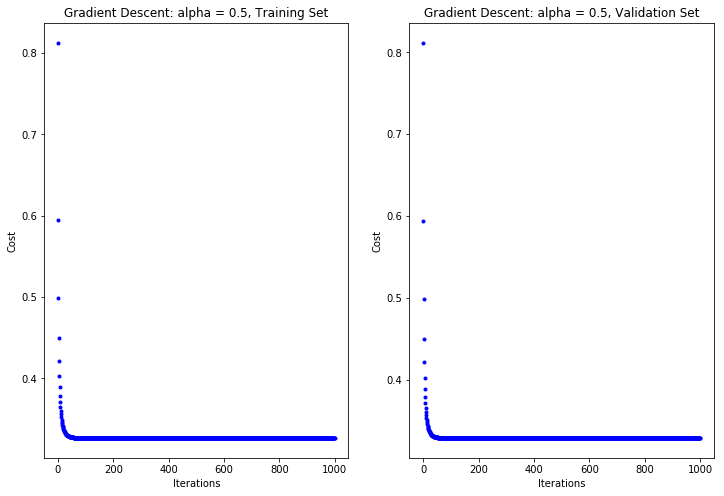

In [173]:
# Alpha = 0.5
alpha = 0.5
num_iters = 1000

theta_3, cost_3_train, cost_3_test = gradientDescent(X_train,y_train,X_test,y_test,theta,alpha,num_iters)

fig = plt.subplots(figsize=(12,8))

plt.subplot(1,2,1) 
plt.ylabel('Cost')
plt.xlabel('Iterations')
plt.plot(range(num_iters), cost_3_train,'b.')
plt.title('Gradient Descent: alpha = 0.5, Training Set')

plt.subplot(1,2,2) 
plt.ylabel('Cost')
plt.xlabel('Iterations')
plt.plot(range(num_iters), cost_3_test,'b.')
plt.title('Gradient Descent: alpha = 0.5, Validation Set')

Based off of these plots, I will decide to use 0.1 for my learning rate. I'm choosing this rate because after plotting various rates, I can see that 0.1 converges quickly for 1000 iterations. A choice of 0.01 doesn't seem to converge in this iteration window, and 0.5 seems to converge too quickly.

## l

In [346]:
class My_LogisticRegression:
    def __init__(self, lr=0.1, num_iter=1000, fit_intercept=False, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
    
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        # weights initialization
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            #gradient = np.dot(X.T, (h - y)) / y.size
            gradient = (1/X.shape[0]) * X.T @ (self.__sigmoid(X @ self.theta) - y)
            #cost,gradient = costFunction(self.theta,X,y)
            self.theta = self.theta - (self.lr * gradient.T)
            # self.theta -= self.lr * gradient
            
            if(self.verbose == True & i % 40 == 0):
                z = np.dot(X, self.theta)
                h = self.__sigmoid(z)
    
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X, threshold):
        return self.predict_prob(X) >= threshold

Fold 0 completed.
Fold 1 completed.
Fold 2 completed.


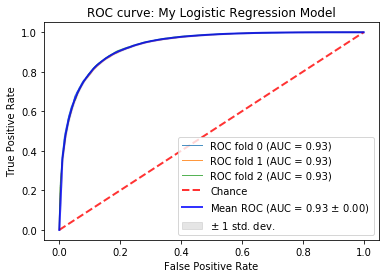

In [348]:
from sklearn.model_selection import StratifiedKFold
from scipy import interp
from sklearn.metrics import roc_curve, auc

X = np.array(data.iloc[:,:-1])
y = np.array(data.iloc[:,2])

cv = StratifiedKFold(n_splits=3)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
my_logreg = My_LogisticRegression()
for train, test in cv.split(X, y):
   my_logreg.fit(X[train], y[train])
   probs = my_logreg.predict_prob(X[test])
   # Compute ROC curve and AUC
   fpr, tpr, thresholds = roc_curve(y[test], probs)
   tprs.append(interp(mean_fpr, fpr, tpr))
   tprs[-1][0] = 0.0
   roc_auc = auc(fpr, tpr)
   aucs.append(roc_auc)
   plt.plot(fpr, tpr, lw=1, alpha=0.8,
            label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
   print('Fold {} completed.'.format(i))
   i += 1

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve: My Logistic Regression Model')
plt.legend(loc="lower right")
plt.show()

## m

We use cross validation in order to prevent overfitting to our training data. If we only train our model on our training data, then we don't know how well it will perform on out-of-sample data (test data). But by using cross-validation and splitting our data into various folds of train-test splits, we can get a better assessment for how our model would perform on a new test set. 

## n

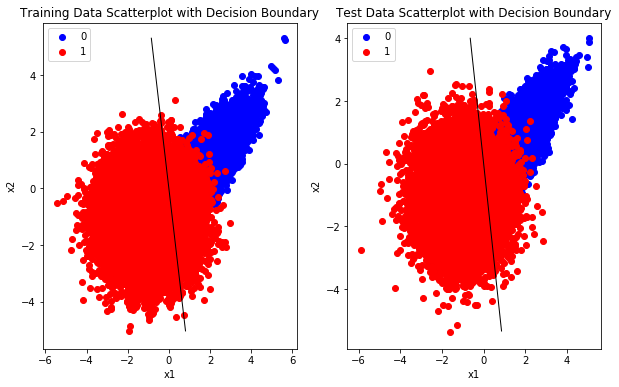

In [284]:
my_logreg.fit(X_train,y_train)
plt.figure(figsize=(10, 6))

plt.subplot(1,2,1)
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='b', label='0')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='r', label='1')
plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Training Data Scatterplot with Decision Boundary')
x1_min, x1_max = X_train[:,0].min(), X_train[:,0].max(),
x2_min, x2_max = X_train[:,1].min(), X_train[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = my_logreg.predict_prob(grid).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='black');

plt.subplot(1,2,2)
plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], color='b', label='0')
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], color='r', label='1')
plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Test Data Scatterplot with Decision Boundary')
x1_min, x1_max = X_test[:,0].min(), X_test[:,0].max(),
x2_min, x2_max = X_test[:,1].min(), X_test[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = my_logreg.predict_prob(grid).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='black');

Looking at these scatterplots, we see that the decision boundary can certainly be improved. It's hard because we don't have completely separated data, so we did well under those conditions, but we can still improve the model. 

## o

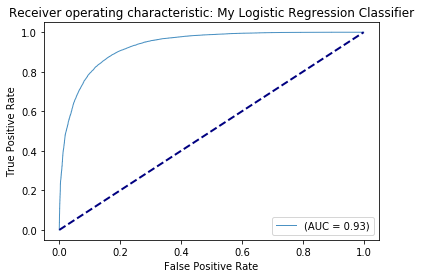

In [289]:
my_logreg = My_LogisticRegression()
my_logreg.fit(X_train,y_train)
probs = my_logreg.predict_prob(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probs)
tprs.append(interp(mean_fpr, fpr, tpr))   
tprs[-1][0] = 0.0
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, lw=1, alpha=0.8,
            label='(AUC = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: My Logistic Regression Classifier')
plt.legend(loc="lower right")
plt.show()

Our model achieves an AUC of 0.93, which performs much better than the chance diagonal. 

## 2

### [20 points] Digits classification

**(a)** Construct your dataset from the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) of handwritten digits, which has a training set of 60,000 examples, and a test set of 10,000 examples. The digits have been size-normalized and centered in a fixed-size image.

Your goal is to determine whether or not an example is a 3, therefore your binary classifier will seek to estimate $y=1$ if the digit is a 3, and $y=0$ otherwise. Create your dataset by transforming your labels into a binary format. 

**(b)** Plot 10 examples of each class 0 and 1, from the training dataset.

**(c)** How many examples are present in each class? Are the classes balanced? What issues might this cause?

**(d)** Using cross-validation, train and test a classifier. Compare your performance against (1) a classifier that randomly guesses the class, and (2) a classifier that guesses that all examples are NOT 3's. Plot corresponding ROC curves and precision-recall curves. Describe the algorithm's performance and explain any discrepancies you find.

**(f)** Using a logistic regression classifier (a linear classifier), apply lasso regularization and retrain the model and evaluate its performance over a range of values on the regularization coefficient. You can implement this using the [LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) module (DO NOT use your function from question 1) and activating the 'l1' penalty; the parameter $C$ is the inverse of the regularization strength. As you vary the regularization coefficient, plot (1) the number of model parameters that are estimated to be nonzero; (2) the logistic regression cost function, which you created a function to evaluate in the Question 1; (3) $F_1$-score, and (4) area under the curve (AUC). Describe the implications of your findings.

**ANSWER**

## a

In [413]:
from mlxtend.data import loadlocal_mnist
X_train, y_train = loadlocal_mnist(
        images_path='./MNIST/train-images-idx3-ubyte', 
        labels_path='./MNIST/train-labels-idx1-ubyte')

X_test, y_test = loadlocal_mnist(
        images_path='./MNIST/t10k-images-idx3-ubyte', 
        labels_path='./MNIST/t10k-labels-idx1-ubyte')


In [414]:
X_train.shape

(60000, 784)

In [415]:
y_train.shape

(60000,)

In [416]:
# Reshape arrays
X_train_img = X_train.reshape(X_train.shape[0], 28,28)
X_test_img = X_test.reshape(X_test.shape[0], 28,28)

In [417]:
X_train_img.shape

(60000, 28, 28)

In [418]:
X_test_img.shape

(10000, 28, 28)

In [419]:
# Convert labels to binary
import numpy as np
y_train_binary = (y_train == 3).astype(np.int)
y_test_binary = (y_test == 3).astype(np.int)

In [355]:
y_test_binary.shape

(10000,)

In [356]:
y_train_binary.shape

(60000,)

## b

1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0


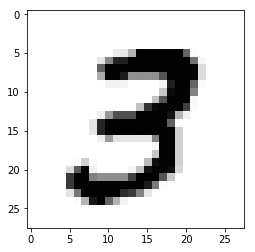

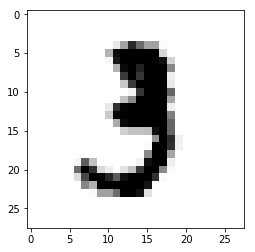

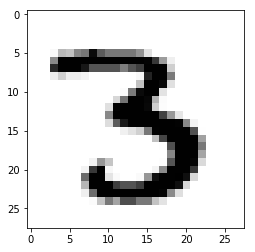

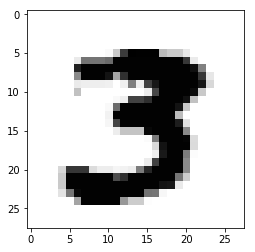

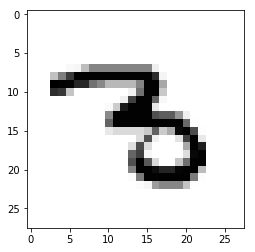

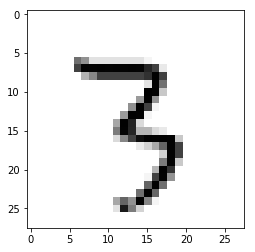

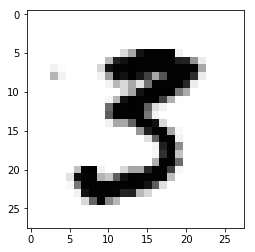

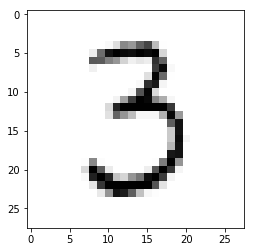

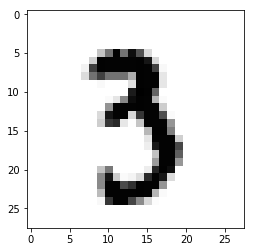

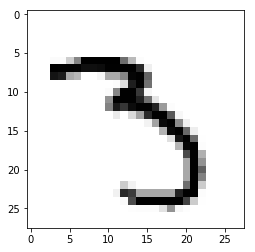

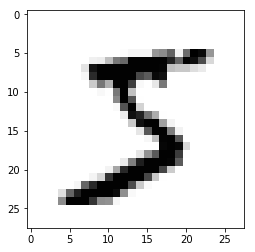

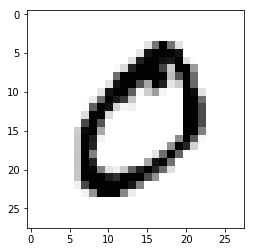

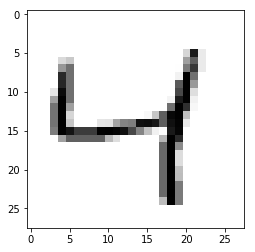

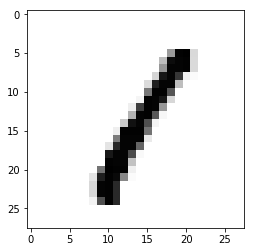

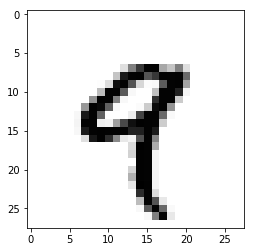

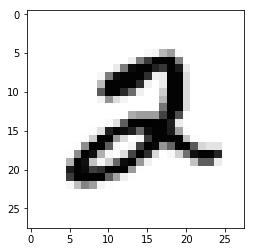

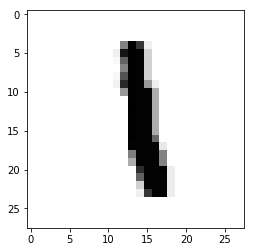

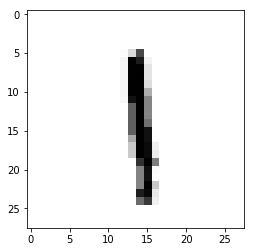

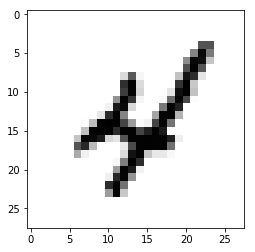

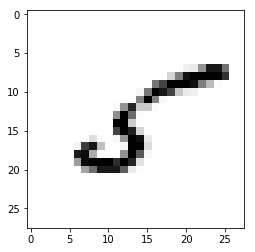

In [299]:
# Plot 10 examples
import matplotlib.pyplot as plt

positive, = np.where(y_train_binary == 1)
first_10_pos = positive[0:10]
negative, = np.where(y_train_binary == 0)
first_10_neg = negative[0:10]

# Print 10 positive images (label = 1)
for i in first_10_pos:
    label = y_train_binary[i]
    print(label)
    plt.figure()
    plt.imshow(X_train_img[i], cmap='Greys')

# Print 10 negative images ( label = 0)
for i in first_10_neg:
    label = y_train_binary[i]
    print(label)
    plt.figure()
    plt.imshow(X_train_img[i], cmap='Greys')


## c

In [300]:
print('Number of Positive Examples: ' + str(y_train_binary[y_train_binary == 1].shape[0])) 
print('Number of Negative Examples: ' + str(y_train_binary[y_train_binary == 0].shape[0])) 

Number of Positive Examples: 6131
Number of Negative Examples: 53869


The classes are very imbalanced (about 90% of the data is labeled 0). Class imbalance can lead to problems with our classifier, such as overprediction of the negative class/inability to identify true positives. 

## d

In [307]:
from scipy import interp
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.utils.fixes import signature


def cv_performance_assessment(X,y,k,clf):
    '''Cross validated performance assessment
    
    X   = training data
    y   = training labels
    k   = number of folds for cross validation
    clf = classifier to use
    
    Divide the training data into k folds of training and validation data. 
    For each fold the classifier will be trained on the training data and
    tested on the validation data. The classifier prediction scores are 
    aggregated and output
    '''
    # Establish the k folds
    prediction_scores = np.empty(y.shape[0],dtype='object')
    kf = StratifiedKFold(n_splits=k, shuffle=True)
    for train_index, val_index in kf.split(X, y):
        # Extract the training and validation data for this fold
        X_train, X_val   = X[train_index], X[val_index]
        y_train          = y[train_index]
        
        # Train the classifier
        clf              = clf.fit(X_train,y_train)
        
        # Test the classifier on the validation data for this fold
        cpred            = clf.predict_proba(X_val)
        
        # Save the predictions for this fold
        prediction_scores[val_index] = cpred[:,1]
        
        
        # Print
        print('Fold' + str(train_index) + 'completed')
    return prediction_scores

def plot_roc_and_pr(labels, prediction_scores,roc_title,pr_title):
    fpr, tpr, _ = metrics.roc_curve(labels, prediction_scores, pos_label=1)
    auc = metrics.roc_auc_score(labels, prediction_scores)
    precision, recall, _ = precision_recall_curve(labels, prediction_scores)
    average_precision = average_precision_score(labels, prediction_scores)
    legend_string = 'AUC = {:0.3f}'.format(auc)
   
    plt.plot([0,1],[0,1],'--', color='gray', label='Chance')
    plt.plot(fpr, tpr, label=legend_string)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid('on')
    plt.axis('square')
    plt.legend()
    plt.title(roc_title)
    plt.tight_layout()
    plt.show()
    
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title(pr_title)

    step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
    plt.step(recall, precision, color='b', alpha=0.2,
         where='post')

    plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

    plt.show()

In [305]:
my_logreg = LogisticRegression()
cv_mylogreg = cv_performance_assessment(X,y_train_binary,3,my_logreg)

/Users/vigneshkumaresan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/vigneshkumaresan/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/vigneshkumaresan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fold[    0     1     3 ... 59994 59996 59997]completed


/Users/vigneshkumaresan/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/vigneshkumaresan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fold[    1     2     3 ... 59997 59998 59999]completed
Fold[    0     2     4 ... 59996 59998 59999]completed


/Users/vigneshkumaresan/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


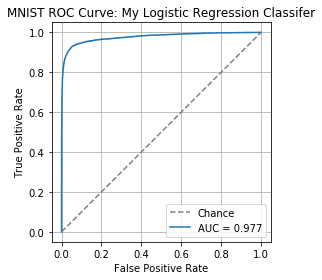

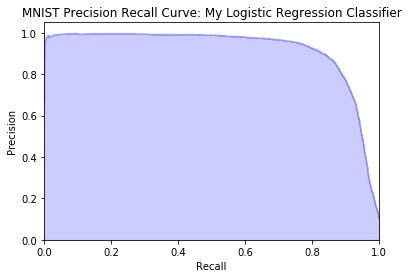

In [308]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.utils.fixes import signature

plot_roc_and_pr(y_train_binary, cv_mylogreg, 'MNIST ROC Curve: My Logistic Regression Classifer', 'MNIST Precision Recall Curve: My Logistic Regression Classifier')

In [309]:
# (1) a classifier that randomly guesses the class
from sklearn.dummy import DummyClassifier

random_clf = DummyClassifier(strategy='uniform', random_state=0)
cv_randomlogreg = cv_performance_assessment(X_train,y_train_binary,3,random_clf)

Fold[    0     1     2 ... 59996 59997 59999]completed
Fold[    1     4     5 ... 59997 59998 59999]completed
Fold[    0     2     3 ... 59994 59995 59998]completed


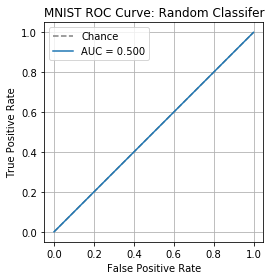

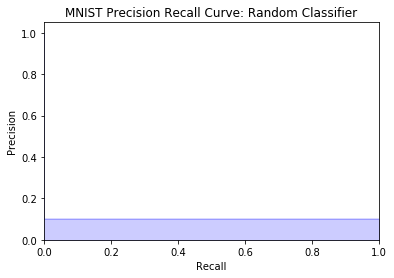

In [311]:
plot_roc_and_pr(y_train_binary, cv_randomlogreg, 'MNIST ROC Curve: Random Classifer', 'MNIST Precision Recall Curve: Random Classifier')

In [312]:
# (2) a classifier that guesses that all examples are NOT 3's.
negative_clf = DummyClassifier(strategy='constant', random_state=0, constant = 0)
cv_negativelogreg = cv_performance_assessment(X_train,y_train_binary,3,negative_clf)

Fold[    0     2     3 ... 59994 59998 59999]completed
Fold[    0     1     5 ... 59996 59997 59998]completed
Fold[    1     2     3 ... 59996 59997 59999]completed


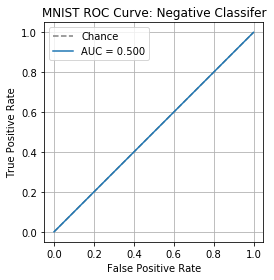

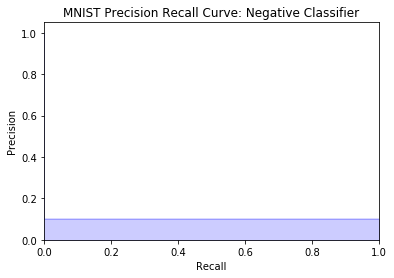

In [313]:
plot_roc_and_pr(y_train_binary, cv_negativelogreg, 'MNIST ROC Curve: Negative Classifer', 'MNIST Precision Recall Curve: Negative Classifier')

### Describe the algorithm's performance and explain any discrepancies you find.

Overall, our logistic regression classifier performs quite well (AUC: 0.98), and we can see that this classifier performs better than a random classifier or a classifier that only predicts 'Not 3'. This data might be overfitting to the train data, but our cross-validation should be showing us that this isn't the case. Since we'll be using logistic regression in the next part as well, we will be able to test this classifier type on our test data and see how it performs.

### e
Using a logistic regression classifier (a linear classifier), apply lasso regularization and retrain the model and evaluate its performance over a range of values on the regularization coefficient. You can implement this using the LogisticRegression module (DO NOT use your function from question 1) and activating the 'l1' penalty; the parameter 𝐶 is the inverse of the regularization strength. As you vary the regularization coefficient, plot (1) the number of model parameters that are estimated to be nonzero; (2) the logistic regression cost function, which you created a function to evaluate in the Question 1; (3) 𝐹1-score, and (4) area under the curve (AUC). Describe the implications of your findings.

In [361]:
# LogReg with Various Regularization Coefficients
# L1, C = 1
logreg_l1_1 = LogisticRegression(penalty = 'l1', C = 1)
logreg_l1_1.fit(X_train, y_train_binary)

/Users/vigneshkumaresan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Count of Nonzero parameters: 615
Cost: 147.26119834861404
F Score: 0.9034397016162452


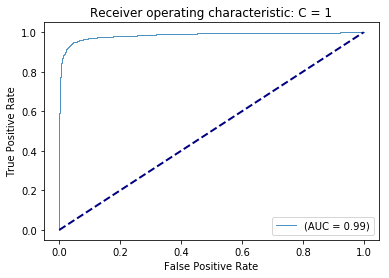

In [435]:
# Nonzero model parameters
parameters_l1_1 = logreg_l1_1.coef_
parameters_1_nonzero = parameters_l1_1[parameters_l1_1 != 0]
parameters_1_nonzero_count = parameters_1_nonzero.shape[0]
print('Count of Nonzero parameters: ' + str(parameters_1_nonzero_count))


# Cost function
(m, n) = X_test.shape
X_test_cost = np.hstack((np.ones((m,1)), X_test))
y_test_cost = y_test[:, np.newaxis]

theta = np.append(logreg_l1_1.coef_,logreg_l1_1.intercept_)  # coefficients from our model
cost_1 = costFunction(theta,X_test_cost, y_test_cost) 
print('Cost: ' + str(cost_1[0]))

# F1-Score
from sklearn.metrics import fbeta_score
y_pred_1 = logreg_l1_1.predict(X_test)
fscore_1 = fbeta_score(y_test_binary, y_pred_1, average='binary', beta=0.5)
print('F Score: ' + str(fscore_1))



# plot AUC
aucs = []
probs_1 = logreg_l1_1.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test_binary, probs_1[:, 1])
tprs.append(interp(mean_fpr, fpr, tpr))   
tprs[-1][0] = 0.0
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)

plt.figure()
lw = 2
plt.plot(fpr, tpr, lw=1, alpha=0.8,
            label='(AUC = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: C = 1')
plt.legend(loc="lower right")
plt.show()

In [365]:
# L1, C = 0.1
logreg_l1_2 = LogisticRegression(penalty = 'l1', C = 0.1)
logreg_l1_2.fit(X_train, y_train_binary)

/Users/vigneshkumaresan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Count of Nonzero parameters: 573
Cost: 103.90565444240025
F Score: 0.9037267080745343


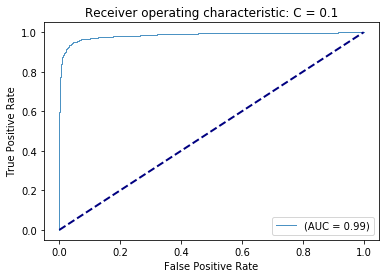

In [436]:
# Nonzero model parameters
parameters_l1_2 = logreg_l1_2.coef_
parameters_2_nonzero = parameters_l1_2[parameters_l1_2 != 0]
parameters_2_nonzero_count = parameters_2_nonzero.shape[0]
print('Count of Nonzero parameters: ' + str(parameters_2_nonzero_count))


# Cost function
(m, n) = X_test.shape
X_test_cost = np.hstack((np.ones((m,1)), X_test))
y_test_cost = y_test[:, np.newaxis]

theta = np.append(logreg_l1_2.coef_,logreg_l1_2.intercept_)  # coefficients from our model
cost_2 = costFunction(theta,X_test_cost, y_test_cost) 
print('Cost: ' + str(cost_2[0]))


# F1-Score
y_pred_2 = logreg_l1_2.predict(X_test)
fscore_2 = fbeta_score(y_test_binary, y_pred_2, average='binary', beta=0.5)
print('F Score: ' + str(fscore_2))



# plot AUC
probs_2 = logreg_l1_2.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test_binary, probs_2[:, 1])
tprs.append(interp(mean_fpr, fpr, tpr))   
tprs[-1][0] = 0.0
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)

plt.figure()
lw = 2
plt.plot(fpr, tpr, lw=1, alpha=0.8,
            label='(AUC = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: C = 0.1')
plt.legend(loc="lower right")
plt.show()

In [367]:
# L1, C = 0.01
logreg_l1_3 = LogisticRegression(penalty = 'l1', C = 0.01)
logreg_l1_3.fit(X_train, y_train_binary)

/Users/vigneshkumaresan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Count of Nonzero parameters: 484
Cost: -201.5532045655716
F Score: 0.905511811023622


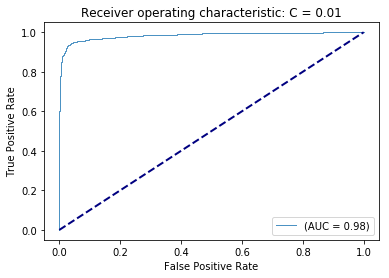

In [437]:
# Nonzero model parameters
parameters_l1_3 = logreg_l1_3.coef_
parameters_3_nonzero = parameters_l1_3[parameters_l1_3 != 0]
parameters_3_nonzero_count = parameters_3_nonzero.shape[0]
print('Count of Nonzero parameters: ' + str(parameters_3_nonzero_count))


# Cost function
(m, n) = X_test.shape
X_test_cost = np.hstack((np.ones((m,1)), X_test))
y_test_cost = y_test[:, np.newaxis]

theta = np.append(logreg_l1_3.coef_,logreg_l1_3.intercept_)  # coefficients from our model
cost_3 = costFunction(theta,X_test_cost, y_test_cost) 
print('Cost: ' + str(cost_3[0]))


# F1-Score
y_pred_3 = logreg_l1_3.predict(X_test)
fscore_3 = fbeta_score(y_test_binary, y_pred_3, average='binary', beta=0.5)
print('F Score: ' + str(fscore_3))



# plot AUC
probs_3 = logreg_l1_3.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test_binary, probs_3[:, 1])
tprs.append(interp(mean_fpr, fpr, tpr))   
tprs[-1][0] = 0.0
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)

plt.figure()
lw = 2
plt.plot(fpr, tpr, lw=1, alpha=0.8,
            label='(AUC = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: C = 0.01')
plt.legend(loc="lower right")
plt.show()

In [357]:
# L1, C = 0.001
logreg_l1_4 = LogisticRegression(penalty = 'l1', C = 0.001)
logreg_l1_4.fit(X_train, y_train_binary)

/Users/vigneshkumaresan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Count of Nonzero parameters: 298
Cost: -596.6103800469222
F Score: 0.8889575607746187


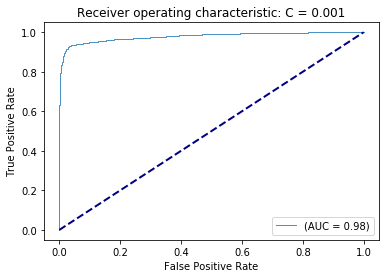

In [441]:
# Nonzero model parameters
parameters_l1_4 = logreg_l1_4.coef_
parameters_4_nonzero = parameters_l1_4[parameters_l1_4 != 0]
parameters_4_nonzero_count = parameters_4_nonzero.shape[0]
print('Count of Nonzero parameters: ' + str(parameters_4_nonzero_count))


# Cost function
(m, n) = X_test.shape
X_test_cost = np.hstack((np.ones((m,1)), X_test))
y_test_cost = y_test[:, np.newaxis]

theta = np.append(logreg_l1_4.coef_,logreg_l1_4.intercept_)  # coefficients from our model
cost_4 = costFunction(theta,X_test_cost, y_test_cost) 
print('Cost: ' + str(cost_4[0]))



# F1-Score
y_pred_4 = logreg_l1_4.predict(X_test)
fscore_4 = fbeta_score(y_test_binary, y_pred_4, average='binary', beta=0.5)
print('F Score: ' + str(fscore_4))



# plot AUC
probs_4 = logreg_l1_4.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test_binary, probs_4[:, 1])
tprs.append(interp(mean_fpr, fpr, tpr))   
tprs[-1][0] = 0.0
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)

plt.figure()
lw = 2
plt.plot(fpr, tpr, lw=1, alpha=0.8,
            label='(AUC = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: C = 0.001')
plt.legend(loc="lower right")
plt.show()

In [431]:
import math
math.log(596)

6.39024066706535

Text(0.5,0,'Regularization Coefficient (lambda)')

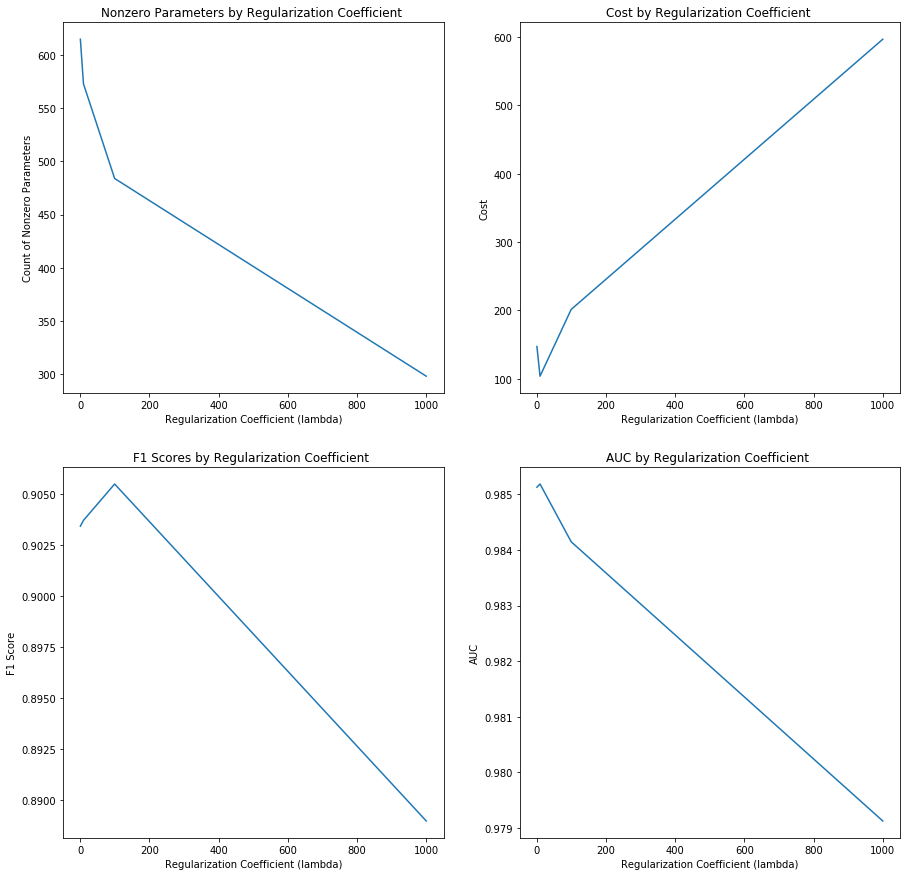

In [444]:
# Plot trends over four variations of the regularization coefficient
reg_coefs = [1, 10, 100, 1000] # 1/C
nonzero_parameters_counts = [parameters_1_nonzero_count, parameters_2_nonzero_count, parameters_3_nonzero_count, parameters_4_nonzero_count]
costs = [math.fabs(cost_1[0]),math.fabs(cost_2[0]),math.fabs(cost_3[0]),math.fabs(cost_4[0])]
f1_scores = [fscore_1, fscore_2, fscore_3, fscore_4]


fig = plt.figure(figsize=(15, 15))

plt.subplot(2, 2, 1) 
plt.plot(reg_coefs, nonzero_parameters_counts)
plt.title('Nonzero Parameters by Regularization Coefficient ')  
plt.ylabel('Count of Nonzero Parameters')  
plt.xlabel('Regularization Coefficient (lambda)')

plt.subplot(2, 2, 2) 
plt.plot(reg_coefs, costs)
plt.title('Cost by Regularization Coefficient ')  
plt.ylabel('Cost')  
plt.xlabel('Regularization Coefficient (lambda)')

plt.subplot(2, 2, 3) 
plt.plot(reg_coefs, f1_scores)
plt.title('F1 Scores by Regularization Coefficient ')  
plt.ylabel('F1 Score')  
plt.xlabel('Regularization Coefficient (lambda)')

plt.subplot(2, 2, 4) 
plt.plot(reg_coefs, aucs)
plt.title('AUC by Regularization Coefficient ')  
plt.ylabel('AUC')  
plt.xlabel('Regularization Coefficient (lambda)')

## 3

### [40 points] Supervised learning exploration

For this exercise, you will construct and implement a supervised learning problem solution/experiment. Describe your process and answer these questions clearly and thoroughly. Part of the grade in this assignment is devoted to the quality and professionalism of your work.

**(a)** Identify a question or problem that's of interest to you and that could be addressed using classification or regression. Explain why it's interesting and what you'd like to accomplish. This should exhibit creativity, and you are not allowed to use the Iris dataset, the Kaggle Titanic dataset, or the Kaggle chocolate dataset.

**(b)** Download the data and plot the data to describe it.

**(c)** Formulate your supervised learning question: (a) What is your target variable (what are you trying to predict) and what predictors do you have available? 
v Does your dataset require any preprocessing: is it clean (no missing values or erroneous data) and normalized (are each of the predictors of the same magnitude)? 

**(d)** What supervised learning technique will you use and why? 

**(e)** How will you evaluate performance and know whether you succeeded (e.g. ROC curves for binary classification, mean square error or $R^2$ for regression)?

**(f)** Divide your dataset into training and testing datasets OR implement cross validation. Explain your approach and why you adopted it.

**(g)** Run your analysis and show your performance. Include plots of your data and of performance.

**(h)** Describe how your system performed, where your supervised learning algorithm performed well, and where it did not, and how you could improve it.

**(i)** Write a brief summary / elevator pitch for this work that you would put on LinkedIn to describe this project to future employers. This should focus on the high level impact and importance and overall takeaways and not on the nitty-gritty details.

**ANSWER**

### a

My passion and career interest is centered around using data science to make better decisions in the healthcare industry. For this reason, I chose the Pima Indians Diabetes Database from Kaggle, which is originally from the National Institute of Diabetes and Digestive and Kidney Diseases

This dataset can be used to predict diabetes and identify which factors might be most influential in this prediction, which could be useful information for developing care management strategies. In a broader context, a predictive model like this could be continually run on an electronic medical record system, allowing the physician and care management team to see diabetes probabilities for each patient. 

This dataset is a bit limited, because it only contains females over the age of 21 who are of Pima Indian heritage, so that will limit the generalization of our model. The data itself contains various diagnostic measures, age, and the outcome variable (a binary flag indicating whether the patient has diabetes or not). With this information, this dataset seems like an interesting candidate for a logistic regression approach, so we will proceed.

### b

In [69]:
# Import data
import pandas as pd

diabetes = pd.read_csv('diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [70]:
# Data Size
diabetes.shape

(768, 9)

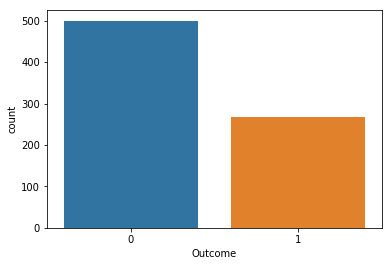

In [71]:
# Plot Outcome variable disribution
import seaborn as sns
import matplotlib.pyplot as plt 

sns.countplot(x='Outcome',data=diabetes)
plt.show()

In [72]:
diabetes['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

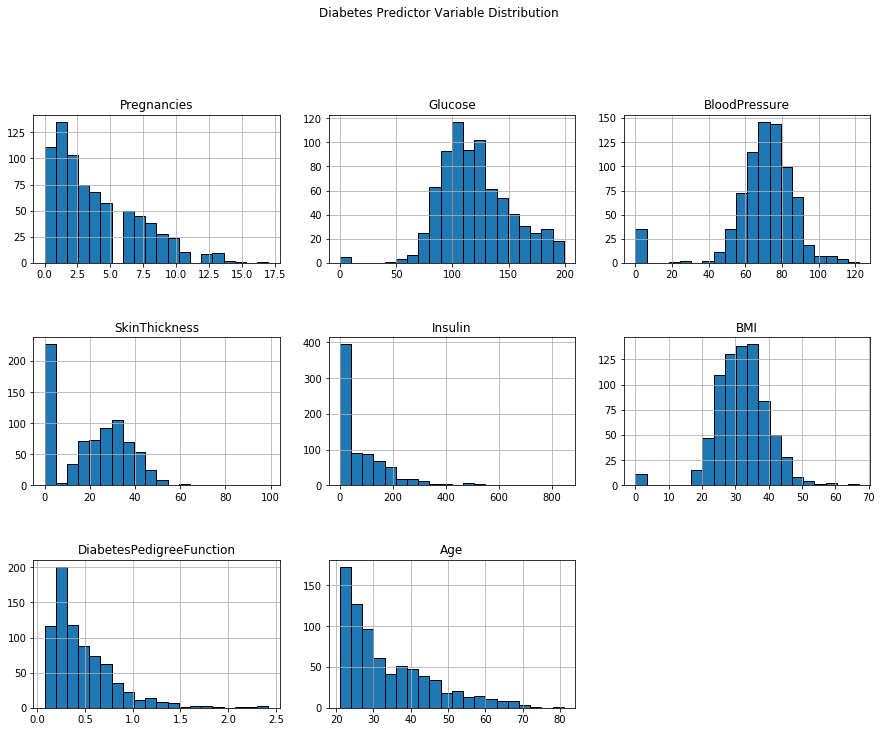

In [73]:
# Plot Predictor variable distribution
import itertools

predictors=diabetes.columns[:8]
plt.subplots(figsize=(15,15))
length=len(predictors)
for i,j in itertools.zip_longest(predictors,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.suptitle('Diabetes Predictor Variable Distribution')
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    diabetes[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

(c) Formulate your supervised learning question: (a) What is your target variable (what are you trying to predict) and what predictors do you have available? v Does your dataset require any preprocessing: is it clean (no missing values or erroneous data) and normalized (are each of the predictors of the same magnitude)?

For this problem, the target variable we have is labeled 'Outcome', which indicates whether the patient has diabetes or not. The predictors we have are:


**Pregnancies**: Number of times pregnant

**Glucose**: Plasma glucose concentration at 2 hours in an oral glucose concentration test

**Bloose Pressure**: Diastolic blood pressure (mm Hg)

**Skin Thickness**: Triceps skin fold thickness (mm)

**Insulin**: 2-Hour serum insulin (mu U/ml)

**BMI**: Body mass index (weight in kg/(height in m)^2)

**Diabetes Pedigree Function**: We don't have a description for this predictor variable.

**Age**: Age (years)

In [7]:
# Check for missing values
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [18]:
# Check class imbalance
diabetes['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

No missing values in our dataset, and features are varied in nature, so no pre-processing necessary here. We do have a slight class imbalance (65% 0, 35% 1), so we will implement Stratified Train-Test-Split to ensure that we have equal classes in our train and validation set. 

**(d) What supervised learning technique will you use and why?**

I will use logistic regression for this problem, since (i) we have a binary outcome and (ii) we are interested in understanding which predictors are most important in predicting our outcome (feature importance). 

Regarding (i), binary outcomes are a good fit for logistic regression because, as we saw in part (1), the sigmoid function employed in logistic regression can give us a probability that each observation (patient) will be in class 1 (has diabetes). 

Regarding (ii), our logistic regression model will also give us coefficient values that allows us to make interpretations about the importance of each variable in predicting our outcome. In this way, we can see that a direct increase/decrease in our coefficient value will lead to a increase/decrease in the log odds of our outcome being a 1, so we can then make strategic decisions about how to prevent this from happening. In a healthcare setting, this is extremely important because healthcare systems can use this model to identify what factors are predictive of the onset of diabetes. They can then use this information to implement prevention strategies that are customized to each individual. 

**(e) How will you evaluate performance and know whether you succeeded (e.g. ROC curves for binary classification, mean square error or 𝑅2 for regression)?**


For this binary classification, I can use ROC curves, precision-recall curves, and accuracy to evaluate the performance of my model.


**(f) Divide your dataset into training and testing datasets OR implement cross validation. Explain your approach and why you adopted it.**

Due to the class imbalance that we noticed in our dataset, I decided to use Stratified Shuffle Split for my training/test split. With this method, I ensure that my train and test sets have equal proportions of my class, which might not normally occur if I did a random train-test split. 

In [76]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=0)
X = diabetes.iloc[:,:-1].values
y = diabetes.iloc[:,8].values.flatten()
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

**(g) Run your analysis and show your performance. Include plots of your data and of performance.**


/Users/vigneshkumaresan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


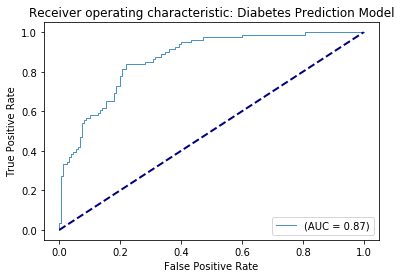

In [77]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from scipy import interp

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)


logreg_diabetes = LogisticRegression()
logreg_diabetes.fit(X_train,y_train)
probs_diabetes = logreg_diabetes.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probs_diabetes[:, 1])
tprs.append(interp(mean_fpr, fpr, tpr))   
tprs[-1][0] = 0.0
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, lw=1, alpha=0.8,
            label='(AUC = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: Diabetes Prediction Model')
plt.legend(loc="lower right")
plt.show()

In [79]:
from sklearn.metrics import accuracy_score

preds_diabetes = logreg_diabetes.predict(X_test)
acc = accuracy_score(y_test, preds_diabetes)
print('Model Accuracy: ' + str(acc))

Model Accuracy: 0.7878787878787878


In [88]:
pd.crosstab(y_test, preds_diabetes, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,136,14,150
1,35,46,81
All,171,60,231


**(h) Describe how your system performed, where your supervised learning algorithm performed well, and where it did not, and how you could improve it.**

The system performed relatively well, if we refer to our model AUC of 0.87 on our holdout test dataset. Our model accuracy is 0.78, but our confusion matrix that our model primarily predicted 0. This is most likely due to the class imbalance present in our dataset, so while we were still able to classify some True Positives (46), we want to improve our reclassification for the patients that were predicted to be 0 but were actually labelled as 1. 

This is especially important for a healthcare context, because we don't want to miss out on providing preventative resources to a patient that will eventually develop diabetes. The best way to improve our model is to gather more data, since our sample size is relatively small for a healthcare outcome prediction. Additionally, gathering/transforming new features can lead to more accurate predictions, since we will be feeding in more patient information into our model. 


**(i) Write a brief summary / elevator pitch for this work that you would put on LinkedIn to describe this project to future employers. This should focus on the high level impact and importance and overall takeaways and not on the nitty-gritty details.**

Clinical decision support is a growing field in the healthcare industry, and as we gather new types of data about patients, the hope is that we can translate this data into actionable insights for physicians and healthcare organizations. With this information, organizations are working to build models that will allow them to identify high-risk patients and provide targeted care earlier, preventing poor health outcomes later and reducing overall cost.

In order to investigate this further, I performed an analysis of the Pima Indians Diabetes dataset from Kaggle (https://www.kaggle.com/uciml/pima-indians-diabetes-database), which is a subset of the data from the National Institute of Diabetes and Digestive and Kidney Diseases, focused specifically on females of Pima Indian heritage. This dataset includes various patient level characteristics, including age, BMI, and insulin level. It also contains a label indicating whether or not the patient had diabetes. Using this information, I decided to build a model that could predict if a patient has diabetes or not.

I ultimately decided to build a logistic regression model, which takes information from my predictors in order to predict the outcome label (whether the patient has diabetes or not). Traditionally, for logistic regression models, we use a scoring metric known as Area Under the Curve (AUC), and the AUC for my model was 0.87. 

With this in mind, we can feel confident in the ability of our model, but we do have several constraints to consider. This model was only trained and tested on a relatively small dataset, so we would have to gather more data to feel more comfortable with our predictions. Additionally, any predictions from this model will only be generalizable to females of Pima Indian heritage, so expanding our dataset would give us additional generalizability as well. 

Overall, I 